# Introduction to Probability

This notebook accompanies the Introduction to Probability lecture and includes the simulations and visualizations for different examples of the use of probability theory in practice. The aim of these examples is to build an intuition on how probability works.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Example 1: a coin toss

In [18]:
possible_outcomes = ['head', 'tail']

def toss_coin(possible_outcomes):
    outcome = random.sample(possible_outcomes, 1)[0]
    return outcome

toss_coin(possible_outcomes)

'head'

In [19]:
def toss_coin_multiple_times(possible_outcomes, count):
    outcomes = []
    for i in range(count):
        outcome = toss_coin(possible_outcomes)
        outcomes.append(outcome)
    return outcomes

toss_coin_multiple_times(possible_outcomes, 10)

['tail',
 'head',
 'head',
 'head',
 'tail',
 'head',
 'tail',
 'head',
 'head',
 'tail']

In [20]:
# how often do we get head vs tail?

def count_outcomes(outcomes):
    values, counts = np.unique(outcomes, return_counts=True)
    return dict(zip(values, counts))

def plot_outcomes(outcomes_summary):
    fig, ax = plt.subplots(clear=True)
    x_values = list(outcomes_summary.keys())
    y_values = list(outcomes_summary.values())
    ax.bar(x_values, y_values)
    ax.title.set_text(f"{sum(y_values)} tosses")

# TODO: add print statements
# TODO: define bionimal distribution and empirical vs theoretical mean (here mention that this is also idea behind Monte Carlo)


{'head': 510, 'tail': 490}


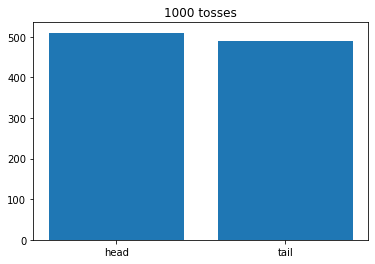

In [23]:
outcomes = toss_coin_multiple_times(possible_outcomes, count=1000)
outcomes_summary = count_outcomes(outcomes)
print(outcomes_summary)
plot_outcomes(outcomes_summary)

Look into the results above: 

- did you get 10 heads or 10 tails, and 0 for the other option?
- what happens if there are more tosses, say 100?

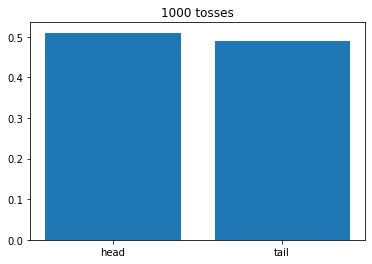

In [24]:
def plot_outcomes_normalized(outcomes_summary):
    fig, ax = plt.subplots(clear=True)
    toss_count = sum(list(outcomes_summary.values()))
    x_values = list(outcomes_summary.keys())
    y_values = np.array(list(outcomes_summary.values())) / toss_count
    ax.bar(x_values, y_values)
    ax.title.set_text(f"{toss_count} tosses")

plot_outcomes_normalized(outcomes_summary)

In [ ]:
# here go to slides and briefly introduce the concept of probability distribution 
# (slides 2-4 https://docs.google.com/presentation/d/1YInfL0FQCwfKzl20R0SuDB0SuvpoQVQ7dYsTHFY5-D4/edit?usp=sharing)

In [ ]:
# What if instead of a coin, we had a die? What would the simulation look like then?

# TODO: write the same simulation here, but instead of tossing a coin, the simulation should roll a 6-sided die

In [ ]:
# potentially add animation here that just runs and adds more and more throws (so it ends up 0.5 aand 0.5)